In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# Upload the dataset
uploaded = files.upload()

# Load dataset
df = pd.read_csv("memory_retention_dataset.csv")
df.head()


Saving memory_retention_dataset.csv to memory_retention_dataset.csv


,SleepHours,TimeSinceStudy,TopicDifficulty,Distractions,Retention
0,8,4,1,1,High
1,7,5,2,2,Medium
2,6,8,3,3,Low
3,9,3,1,1,High
4,5,10,3,3,Low


In [ ]:
# Check dataset info
print(df.info())

# Encode categorical target
le = LabelEncoder()
df["Retention"] = le.fit_transform(df["Retention"])  # High, Medium, Low → numeric

# Features and Target
X = df[["SleepHours", "TimeSinceStudy", "TopicDifficulty", "Distractions"]]
y = df["Retention"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data ready for training!")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SleepHours       51 non-null     int64 
 1   TimeSinceStudy   51 non-null     int64 
 2   TopicDifficulty  51 non-null     int64 
 3   Distractions     51 non-null     int64 
 4   Retention        51 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.1+ KB
None
✅ Data ready for training!


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train model
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)

# Evaluation
log_acc = accuracy_score(y_test, y_pred_log)
print(f"🔹 Logistic Regression Accuracy: {log_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


🔹 Logistic Regression Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00         3
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


Confusion Matrix:
 [[6 0 0]
 [0 3 0]
 [0 0 2]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"🔹 KNN Accuracy: {knn_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


🔹 KNN Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00         3
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


Confusion Matrix:
 [[6 0 0]
 [0 3 0]
 [0 0 2]]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluation
nb_acc = accuracy_score(y_test, y_pred_nb)
print(f"🔹 Naive Bayes Accuracy: {nb_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


🔹 Naive Bayes Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         6
         Low       1.00      1.00      1.00         3
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11


Confusion Matrix:
 [[6 0 0]
 [0 3 0]
 [0 0 2]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"🔹 Decision Tree Accuracy: {dt_acc:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


🔹 Decision Tree Accuracy: 0.91

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.83      0.91         6
         Low       1.00      1.00      1.00         3
      Medium       0.67      1.00      0.80         2

    accuracy                           0.91        11
   macro avg       0.89      0.94      0.90        11
weighted avg       0.94      0.91      0.91        11


Confusion Matrix:
 [[5 0 1]
 [0 3 0]
 [0 0 2]]


🔸 Model Performance Comparison:
Logistic Regression: 1.00
KNN: 1.00
Naive Bayes: 1.00
Decision Tree: 0.91


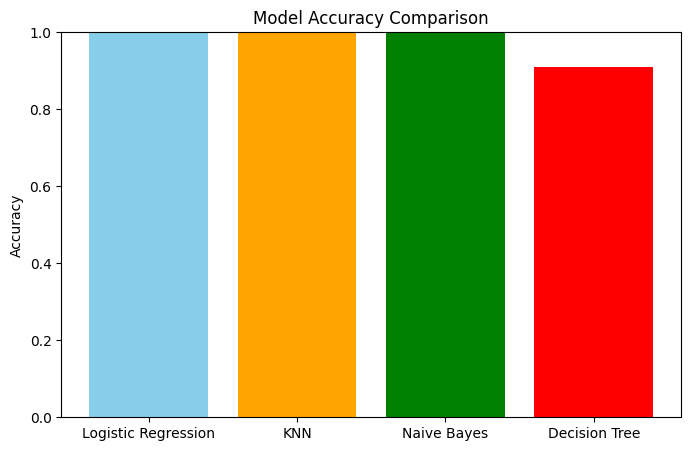


🏆 Best Model: Logistic Regression (Accuracy: 1.00)


In [ ]:
# Combine all results
results = {
    "Logistic Regression": log_acc,
    "KNN": knn_acc,
    "Naive Bayes": nb_acc,
    "Decision Tree": dt_acc
}

# Display results
print("🔸 Model Performance Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.2f}")

# Plot bar graph
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['skyblue','orange','green','red'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()

# Find best model
best_model = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model} (Accuracy: {results[best_model]:.2f})")


In [ ]:


import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1️⃣ Generate dataset
rows = []
for i in range(50):
    sleep = random.randint(4, 9)
    time_since = random.randint(1, 10)
    diff = random.randint(1, 5)
    dist = random.randint(0, 4)

    if sleep >= 7 and time_since <= 3 and diff <= 3 and dist <= 1:
        out = "High"
    elif sleep >= 5 and time_since <= 6 and diff <= 4:
        out = "Medium"
    else:
        out = "Low"

    rows.append([sleep, time_since, diff, dist, out])

data = pd.DataFrame(rows, columns=["Sleep_hours","Time_since_study","Topic_difficulty","Distractions","Output"])

# 2️⃣ Encode Output
le = LabelEncoder()
data["Output_encoded"] = le.fit_transform(data["Output"])

# 3️⃣ Train-test split
X = data[["Sleep_hours","Time_since_study","Topic_difficulty","Distractions"]]
y = data["Output_encoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate accuracy
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"🏆 Logistic Regression Model Trained Successfully!")
print(f"✅ Accuracy: {acc:.2f}\n")

# 5️⃣ Create text boxes for user input
sleep_input = widgets.Text(value='', placeholder='Enter sleep hours (4–9)', description='😴 Sleep:')
time_input = widgets.Text(value='', placeholder='Enter time since study (1–10)', description='⏰ Time:')
diff_input = widgets.Text(value='', placeholder='Enter topic difficulty (1–5)', description='📘 Difficulty:')
dist_input = widgets.Text(value='', placeholder='Enter distractions (0–4)', description='💬 Distractions:')
predict_button = widgets.Button(description="🔮 Predict Retention", button_style='info')
output_box = widgets.Output()

# 6️⃣ Prediction function
def on_predict_clicked(b):
    with output_box:
        clear_output()
        try:
            s = float(sleep_input.value)
            t = float(time_input.value)
            d = float(diff_input.value)
            dis = float(dist_input.value)

            new_data = [[s, t, d, dis]]
            pred_encoded = model.predict(new_data)[0]
            pred_label = le.inverse_transform([int(round(pred_encoded))])[0]

            color = {"High":"green","Medium":"orange","Low":"red"}[pred_label]

            print(f"✅ Input: Sleep={s}, Time={t}, Difficulty={d}, Distractions={dis}")
            display(widgets.HTML(f"<h3 style='color:{color};'>🧠 Predicted Retention: {pred_label}</h3>"))
        except:
            print("⚠️ Please enter valid numeric values in all fields.")

predict_button.on_click(on_predict_clicked)

# 7️⃣ Display interactive input form
display(widgets.VBox([
    sleep_input, time_input, diff_input, dist_input,
    predict_button, output_box
]))


🏆 Logistic Regression Model Trained Successfully!
✅ Accuracy: 0.80

